<a href="https://colab.research.google.com/github/stp511/HealthPredictionProject2/blob/main/StevenPhillips_Project2_Part3_StrokePredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 2 Part 3 - Stroke Predictions**
- **Steven Phillips**
- November 10, 2022

The goal of this project will be to use the data set and create a best model for predicting the presence of stroke in patients.  

## **Import Libraries, Load, Copy and Explore Data**


In [44]:
#import the pandas and numpy library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#mount data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
#Load the data for Stroke Prediction Data Set csv file as a data frame, copy the data frame and present the first five rows
filename = '/content/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(filename)
df_ml = df.copy()
df_ml.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **Project 2 - Part 1 Questions**

1. Source of Data
2. Brief description of data
3. What is the target?
4. What does one row represent?
5. Is this a regression or classification problem?
6. How many features does the data have?
7. How many rows in the data set?
8. What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset?

### **1. Source of data**

1. The source of this data is the Kaggle website and here is the link:

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### **2. Brief description of data**

"This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient." 

Source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### **3. What is the target?**

The target for this data set will be the 'stroke' feature.  Specifically, whether or not each patient had a stroke.

### **4. What does one row represent?**

Each row represents a patient from the study.

### **5. Is this a regression or a classification problem?**

The model will predict the stroke feature, which is a binary classification problem, 'stroke' or 'no stroke'.

### **6. How many features does the data have?**

The data comes with 12 features, as seen in the first five rows of the data frame above.  However, the first feature, essentially the patient id, will not be used in modeling.  So there will be 10 features, including a mix of categorical and numerical, to choose from and one target feature.

### **7. How many rows in the data set?**

There are 5,110 observations or rows.

In [47]:
# shape of the data  (rows, columns)
df_ml.shape

(5110, 12)

### **8. What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset?**

There are a few issues that present challenges.  Choosing the best classification model will be a challenge.  Initially, cleaning the data set will have issues including dealing with missing entries from the bmi feature and checking the naming is consistent for the object data type features.

In [48]:
# missing data by feature
df_ml.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## **Project 2 - Part 2 Clean and Explore the Data Set**

## **Data Cleaning**

**Be sure to address:**
- delete unnecessary columns
- delete duplicate rows
- identify and address missing values
- identify and correct inconsistencies in data for categorical values


In [49]:
# check number of unique values by feature
df_ml.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

### **'id' unnecessary for analysis and will be dropped here:**

In [50]:
# drop 'id' feature
df_ml = df_ml.drop(columns = ['id'])


### **No duplicated rows to address:**

In [51]:
# check for duplicate rows
df_ml.duplicated().sum()

0

### **Check for missing values:**

In [52]:
df_ml.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### **'bmi' missing 201 values:**

Impute the mean bmi into the 201 missing values.

In [53]:
# calculate the mean 'bmi' and impute into the missing values
mean_bmi = df_ml['bmi'].mean()
df_ml['bmi'].fillna(mean_bmi, inplace=True)
df_ml.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [55]:
# Check categories for inconsistencies

for col in df_ml.select_dtypes('object'):
  print(f'{df_ml[col].value_counts()} \n')

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

Yes    3353
No     1757
Name: ever_married, dtype: int64 

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 



## **Exploratory Visuals**

- produce univariate visuals for the target and all features
- identify outliers

### **'stroke'**

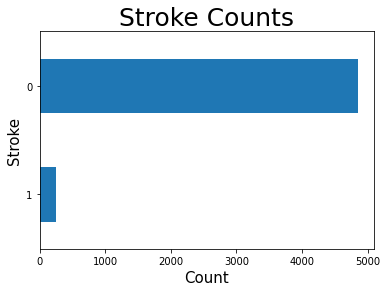

In [56]:
#create a 'stroke' counts bar graph
stroke_counts = df_ml['stroke'].value_counts().sort_values()

# Plot the counts of each stroke level

stroke_counts.plot(kind = 'barh')
plt.title('Stroke Counts', fontsize = 25)
plt.ylabel('Stroke', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

#Show the figure
plt.show();

### **'gender'**

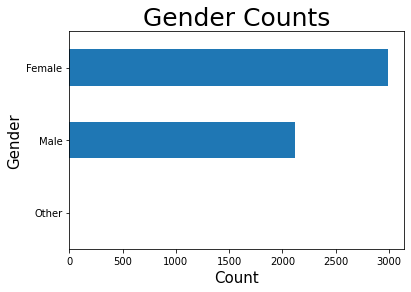

In [57]:
#create a 'gender' counts bar graph
gender_counts = df_ml['gender'].value_counts().sort_values()

# Plot the counts of each gender level

gender_counts.plot(kind = 'barh')
plt.title('Gender Counts', fontsize = 25)
plt.ylabel('Gender', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

#Show the figure
plt.show();

### **'ever-married'**

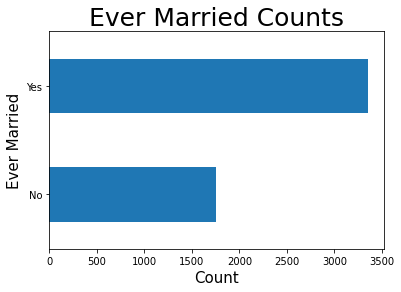

In [58]:
#create a 'ever_married' counts bar graph
marriage_counts = df_ml['ever_married'].value_counts().sort_values()

# Plot the counts of each marriage level

marriage_counts.plot(kind = 'barh')
plt.title('Ever Married Counts', fontsize = 25)
plt.ylabel('Ever Married', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

#Show the figure
plt.show();

### **'work_type'**

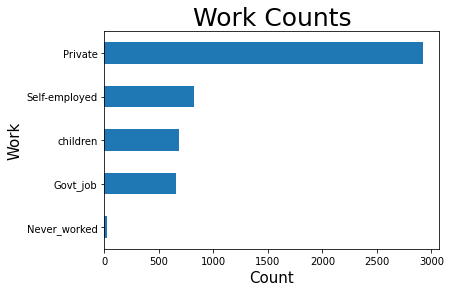

In [59]:
#create a 'work_type' counts bar graph
work_counts = df_ml['work_type'].value_counts().sort_values()

# Plot the counts of each work type level

work_counts.plot(kind = 'barh')
plt.title('Work Counts', fontsize = 25)
plt.ylabel('Work', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

#Show the figure
plt.show();

### **'Residence_type'**

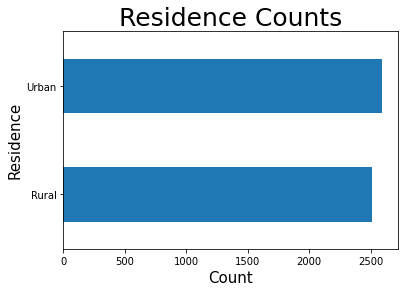

In [60]:
#create a 'residence_type' counts bar graph
residence_counts = df_ml['Residence_type'].value_counts().sort_values()

# Plot the counts of each residence type level

residence_counts.plot(kind = 'barh')
plt.title('Residence Counts', fontsize = 25)
plt.ylabel('Residence', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

#Show the figure
plt.show();

### **'smoking_status'**

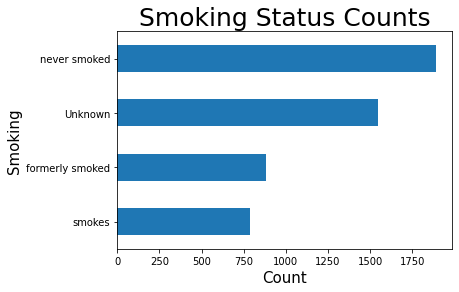

In [61]:
#create a 'smoking_status' counts bar graph
smoking_counts = df_ml['smoking_status'].value_counts().sort_values()

# Plot the counts of each smoking status level

smoking_counts.plot(kind = 'barh')
plt.title('Smoking Status Counts', fontsize = 25)
plt.ylabel('Smoking', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

#Show the figure
plt.show();

### **'heart_disease'**

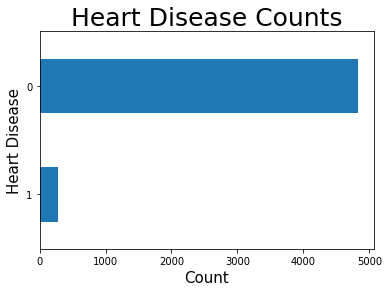

In [62]:
#create a 'heart_disease' counts bar graph
heartdisease_counts = df_ml['heart_disease'].value_counts().sort_values()

# Plot the counts of each heart disease level

heartdisease_counts.plot(kind = 'barh')
plt.title('Heart Disease Counts', fontsize = 25)
plt.ylabel('Heart Disease', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

#Show the figure
plt.show();

### **'hypertension'**

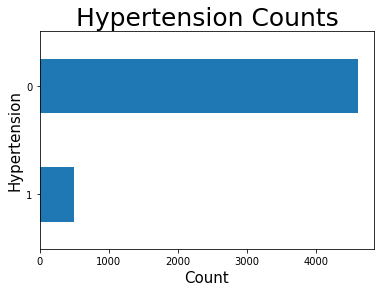

In [63]:
#create a 'hypertension' counts bar graph
hypertension_counts = df_ml['hypertension'].value_counts().sort_values()

# Plot the counts of each heart disease level

hypertension_counts.plot(kind = 'barh')
plt.title('Hypertension Counts', fontsize = 25)
plt.ylabel('Hypertension', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

#Show the figure
plt.show();

### **'age'**

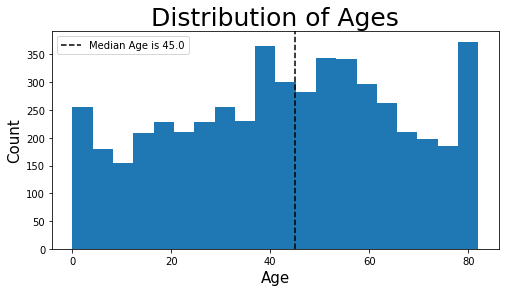

In [64]:
## histogram of ages
plt.figure(figsize = (8,4))
plt.hist(df_ml['age'], bins = 'auto')

## including the median Age
median_age = df_ml['age'].median().round(2)

## titling and labeling
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Distribution of Ages', fontsize = 25)

plt.axvline(median_age, color = 'black', linestyle = '--', label = f'Median Age is {median_age}')
plt.legend();

The histogram above is displaying the distribution of the 'age' variable.  The distribution is somewhate uniform with a few small peaks in values, and with ages ranging from very young (close to newborns) all the way to individuals just over 80, and with a median age of 45.

### **'bmi'**

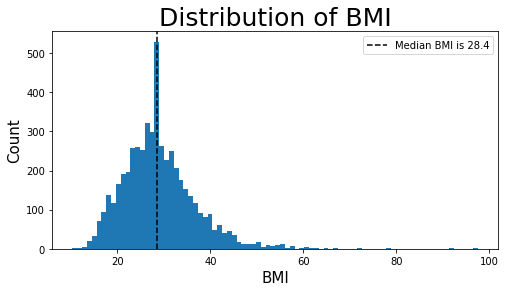

In [65]:
## histogram of bmi
plt.figure(figsize = (8,4))
plt.hist(df_ml['bmi'], bins = 'auto')

## including the median Age
median_bmi = df_ml['bmi'].median().round(2)

## titling and labeling
plt.xlabel('BMI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Distribution of BMI', fontsize = 25)

plt.axvline(median_bmi, color = 'black', linestyle = '--', label = f'Median BMI is {median_bmi}')
plt.legend();

The histogram above is displaying the distribution of the 'bmi' variable.  The distribution is fairly symmetric except for several larger outliers.

### **'avg_glucose_level'**

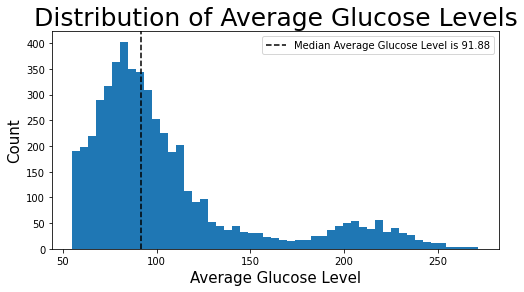

In [66]:
## histogram of Average Glucose Level
plt.figure(figsize = (8,4))
plt.hist(df_ml['avg_glucose_level'], bins = 'auto')

## including the median Age
median_agl = df_ml['avg_glucose_level'].median().round(2)

## titling and labeling
plt.xlabel('Average Glucose Level', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Distribution of Average Glucose Levels', fontsize = 25)

plt.axvline(median_agl, color = 'black', linestyle = '--', label = f'Median Average Glucose Level is {median_agl}')
plt.legend();

The histogram above is displaying the distribution of the 'avg_glucose_level' variable.  The distribution is not symmetric, and has some skewness to the right.  The median is below 100 and the maximum value is above 250.

### **Check for outliers in 'avg-glucose_level', 'bmi', and 'ages'**

#### **.describe() for initial investigation**

In [67]:
# common summary statistics
df_ml.describe().round(4)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.0000,5110.0000,5110.0000,5110.0000,5110.0000,5110.0000
mean,43.2266,0.0975,0.0540,106.1477,28.8932,0.0487
std,22.6126,0.2966,0.2261,45.2836,7.6980,0.2153
min,0.0800,0.0000,0.0000,55.1200,10.3000,0.0000
25%,25.0000,0.0000,0.0000,77.2450,23.8000,0.0000
50%,45.0000,0.0000,0.0000,91.8850,28.4000,0.0000
75%,61.0000,0.0000,0.0000,114.0900,32.8000,0.0000
max,82.0000,1.0000,1.0000,271.7400,97.6000,1.0000


### **Boxplots showing the outliers in the numerical columns:**

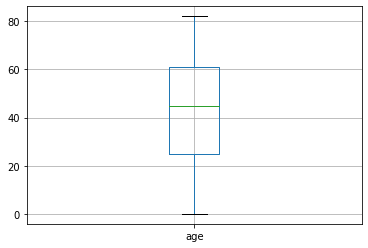

In [68]:
df_ml.boxplot(column = 'age');

No outliers in the 'Age' column.

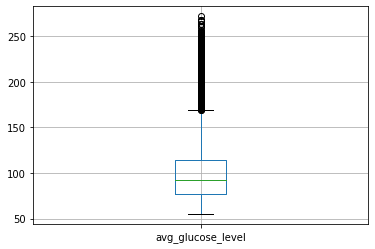

In [69]:
df.boxplot(column = 'avg_glucose_level');

Many outliers in the 'avg_glucose_level' column.

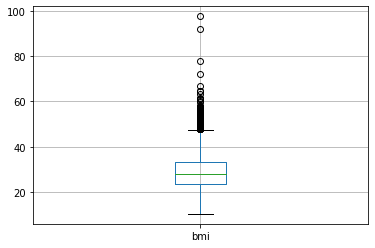

In [70]:
df.boxplot(column = 'bmi',);

Several outliers in the 'bmi' values.

The following function was adapted from https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/

In [71]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1
   print(f'The first quartile is: {q1:.2f}.')
   print(f'The third quartile is: {q3:.2f}.')
   print(f'The upper fence is {(q3+1.5*IQR):.02f}.')
   print(f'The lower fence is {(q1 - 1.5*IQR):.02f}.')

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

### Outlier information for 'bmi' column.

In [72]:
outliers = find_outliers_IQR(df_ml['bmi'])

print('number of outliers: ' + str(len(outliers)))

print('max outlier value: ' + str(outliers.max()))

print('min outlier value: ' + str(outliers.min()))

The first quartile is: 23.80.
The third quartile is: 32.80.
The upper fence is 46.30.
The lower fence is 10.30.
number of outliers: 126
max outlier value: 97.6
min outlier value: 10.3


### Outlier information for 'avg_glucose_level' column.

In [73]:
outliers = find_outliers_IQR(df_ml['avg_glucose_level'])

print('number of outliers: ' + str(len(outliers)))

print('max outlier value: ' + str(outliers.max()))

print('min outlier value: ' + str(outliers.min()))

The first quartile is: 77.25.
The third quartile is: 114.09.
The upper fence is 169.36.
The lower fence is 21.98.
number of outliers: 627
max outlier value: 271.74
min outlier value: 169.43


### Outlier information for 'age' column.

In [74]:
outliers = find_outliers_IQR(df_ml['age'])

print('number of outliers: ' + str(len(outliers)))

print('max outlier value: ' + str(outliers.max()))

print('min outlier value: ' + str(outliers.min()))

The first quartile is: 25.00.
The third quartile is: 61.00.
The upper fence is 115.00.
The lower fence is -29.00.
number of outliers: 0
max outlier value: nan
min outlier value: nan


## **Project 2 - Part 3 Tasks:**

### **1. Identify any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.**

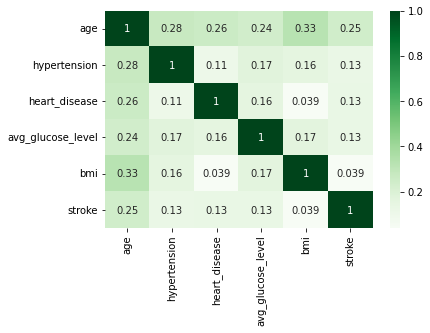

In [75]:
# create the correlations
corr = df_ml.corr()

# plot the correlations created above in a heatmap
sns.heatmap(corr, cmap = 'Greens', annot = True);


There are no moderate or strong correlations between the target 'stroke' with any other feature.  The largest correlation value including the 'stroke' target is the correlation of 0.25 with 'age'.  However, the largest correlation value between any two features is 0.33 between the 'age' and 'bmi' features.  This is still not a moderate or strong correlation.

### **2. Create multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


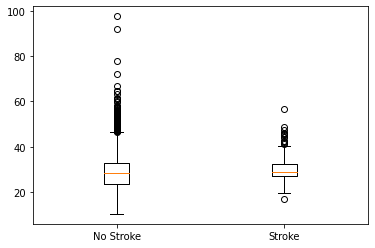

In [76]:
## create a side by side boxplot of 'bmi' across 'stroke'
no_stroke_label = df_ml.loc[df['stroke']== 0, 'bmi'].values
stroke_label = df_ml.loc[df['stroke']== 1, 'bmi'].values
plt.boxplot([no_stroke_label, stroke_label], labels = ['No Stroke', 'Stroke']);

The distribution of 'bmi' of individuals with stroke is less spread out than the distribution of 'bmi' of individuals without stroke.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


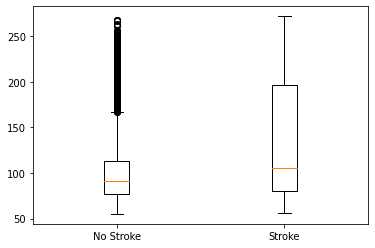

In [77]:
## create a side by side boxplot of 'avg_glucose_level' across 'stroke'
no_stroke_label = df_ml.loc[df['stroke']== 0, 'avg_glucose_level'].values
stroke_label = df_ml.loc[df['stroke']== 1, 'avg_glucose_level'].values
plt.boxplot([no_stroke_label, stroke_label], labels = ['No Stroke', 'Stroke']);

The distribution of 'avg_glucose_level' of individuals with stroke is more spread out than the distribution of 'avg_glucose_level' of individuals without stroke.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


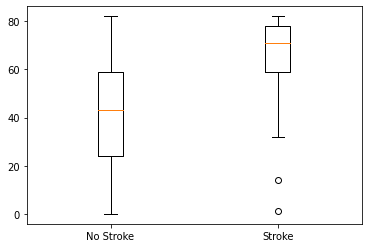

In [78]:
## create a side by side boxplot of 'age' across 'stroke'
no_stroke_label = df_ml.loc[df['stroke']== 0, 'age'].values
stroke_label = df_ml.loc[df['stroke']== 1, 'age'].values
plt.boxplot([no_stroke_label, stroke_label], labels = ['No Stroke', 'Stroke']);

The distribution of 'age' of individuals with stroke is less spread out than the distribution of 'age' of individuals without stroke.  Overall, the values of the 'age' distribution are higher for those with stroke.

Text(0.5, 0, 'BMI')

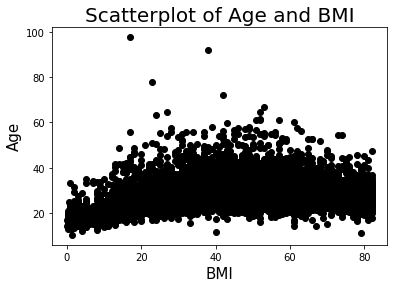

In [79]:
## producing a scatterplot of 'age'' with 'bmi'
age_corr = df['age'].values
bmi_corr = df['bmi'].values

plt.scatter(age_corr, bmi_corr, c = 'k')

## titles and labels
plt.title('Scatterplot of Age and BMI', fontsize = 20)
plt.ylabel('Age', fontsize = 15)
plt.xlabel('BMI', fontsize = 15)


Text(0.5, 0, 'BMI')

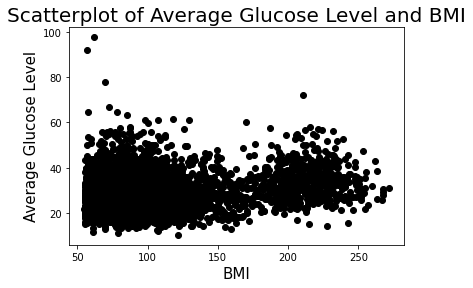

In [80]:
## producing a scatterplot of 'ave_glucose_level'' with 'bmi'
avg_corr = df['avg_glucose_level'].values
bmi_corr = df['bmi'].values

plt.scatter(avg_corr, bmi_corr, c = 'k')

## titles and labels
plt.title('Scatterplot of Average Glucose Level and BMI', fontsize = 20)
plt.ylabel('Average Glucose Level', fontsize = 15)
plt.xlabel('BMI', fontsize = 15)


## **Explanatory Visuals**

## **Models, Prediction and Analysis**